
houseprice.csv는 주택판매가격(price)과 이에 영향을 줄 것으로 판단되는 4가지 설명변수인 세금(tax; 만원), 대지평수(ground; 평), 건물평수(floor; 평), 주택연령(year; 년)을 27개 주택에 대해 조사한 것이다. 


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import seaborn as sns
# data_path = "../data/"
house = pd.read_csv("C:/Users/ambit/Downloads/Dataset-20230330/houseprice.csv")
house

,price,tax,ground,floor,year
0,12.95,98.352,34.720,19.96,4.2
1,14.75,100.416,35.310,30.00,6.2
2,13.95,90.858,22.750,23.50,4.0
3,12.95,91.146,40.500,24.64,5.4
4,14.95,101.194,44.550,22.42,4.2
5,14.95,77.820,44.550,19.76,5.6
6,15.45,117.960,58.500,24.80,5.1
7,14.45,112.186,95.200,30.02,3.2
8,42.45,308.404,98.000,68.40,4.2
9,41.45,289.196,128.000,60.00,1.4


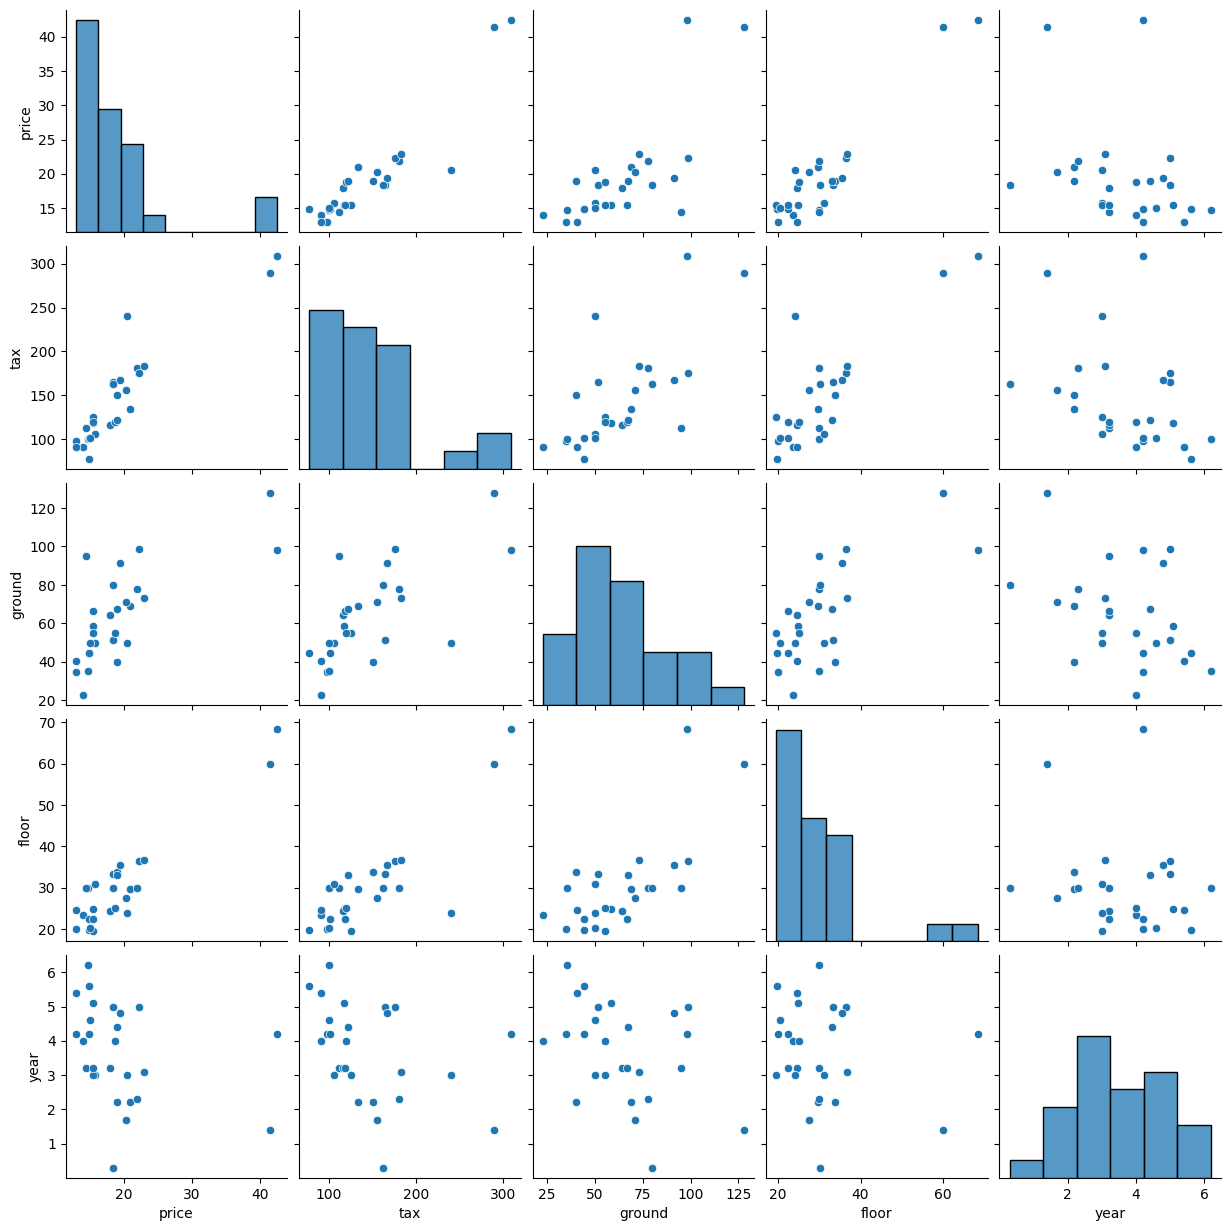

In [2]:
sns.pairplot(house)

#### 1. 주택 가격과 세금 간의 산점도 행렬과 상관계수를 구하시오. 두 변수 간의 선형관계가 존재하는가? 산점도 행렬을 보면 3개의 특이한 관측치가 나타난다. 이들 값의 특성은 무엇인가?

In [3]:
house.corr()

,price,tax,ground,floor,year
price,1.000000,0.915249,0.726335,0.928827,-0.310290
tax,0.915249,1.000000,0.686850,0.832415,-0.371172
ground,0.726335,0.686850,1.000000,0.703269,-0.380275
floor,0.928827,0.832415,0.703269,1.000000,-0.178057
year,-0.310290,-0.371172,-0.380275,-0.178057,1.000000


#### 2. 주택 가격을 종속변수로 하고 세금을 설명변수로 하는 단순선형회귀모형을 적합하여 적합된 회귀식을 쓰시오. 

In [11]:
model1 = smf.ols('price~tax', data=house).fit()
model1.summary()

# y = 2.7907+0.01136x

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     129.0
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           2.31e-11
Time:                        19:57:26   Log-Likelihood:                -66.382
No. Observations:                  27   AIC:                             136.8
Df Residuals:                      25   BIC:                             139.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7907      1.556      1.794      0.085      -0.413       5.994
tax            0.1136      0.010     11.359      0.000       0.093       0.134
==============================================================================
Omnibus:                       11.576   Durbin-Watson:                   1.335
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.951
Skew:                          -0.909   Prob(JB):                     0.000935
Kurtosis:                       6.016   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3. tax의 계수에 대한 95% 신뢰구간을 계산하고 해석하시오. 

In [13]:
model1.conf_int(alpha=0.05)

# price가 올라 갈때 평균적으로 tax [0.092995,  0.134188] 증가
# tax와 price간의 유의한 상관관계가 있다

,0,1
Intercept,-0.412993,5.994431
tax,0.092995,0.134188


#### 4. tax의 계수에 대한 가설검정을 진행하시오. 

In [ ]:
# 유의수준 0.05하에 h0을 기각, h1을 채택

#### 5. 모형의 R-square는 몇 인가? 그것의 의미는 무엇인가?

In [15]:
# 0.83의 값을 가지므로 1에 가까울 수록 설명력이 있다
model1.rsquared


0.8376815840383706

#### 6. tax가 중위수인 집의 가격을 예측하려고 한다. 신뢰구간과 예측구간을 구하고 각 구간의 의미를 해석하시오. 

In [23]:
pred = model1.get_prediction(exog = dict(tax=121.862))
pred.summary_frame(alpha = 0.05)

# 신뢰구간 15.375306 ~ 17.891119
# 예측구간 10.450429 ~ 22.815996


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,16.633213,0.610771,15.375306,17.891119,10.450429,22.815996


In [22]:
house.tax.median()

121.862